In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


# Load the data
data = pd.read_csv("kc_house_data.csv")

# Display the first few rows and statistics of the dataset
print(data.head())
print(data.describe())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

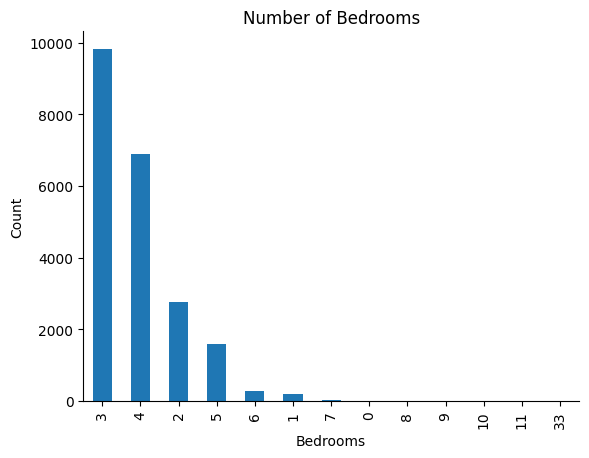

<Figure size 1000x1000 with 0 Axes>

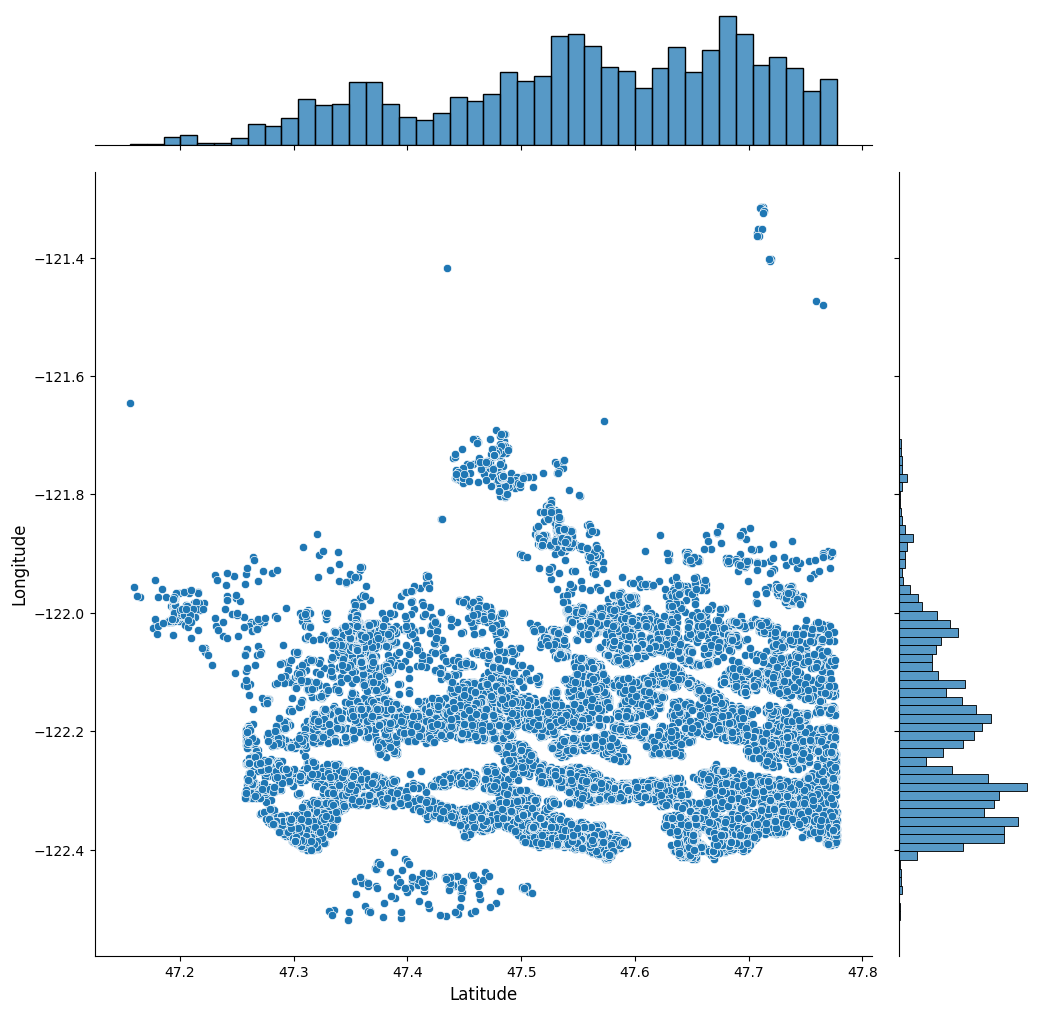

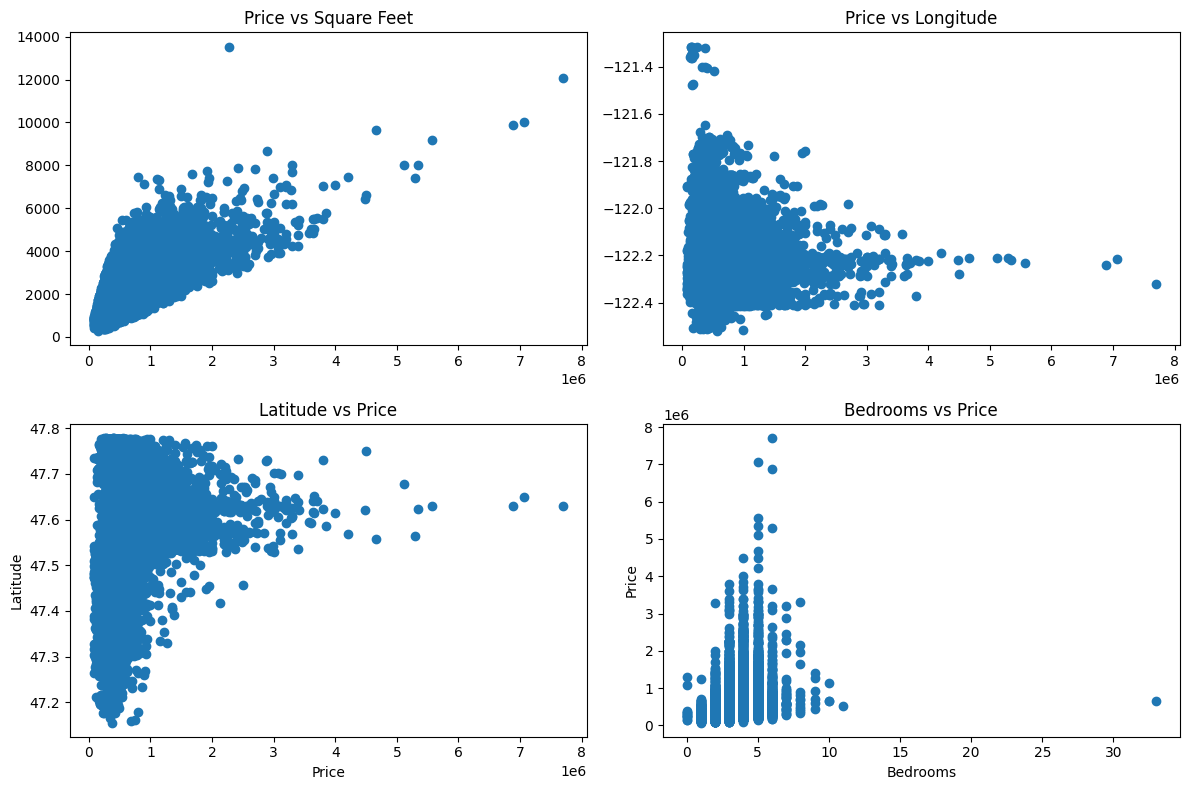

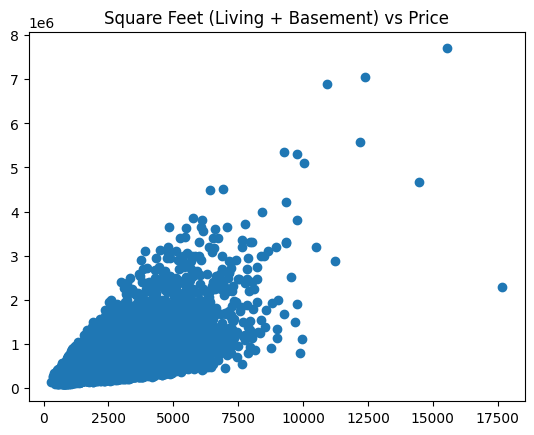

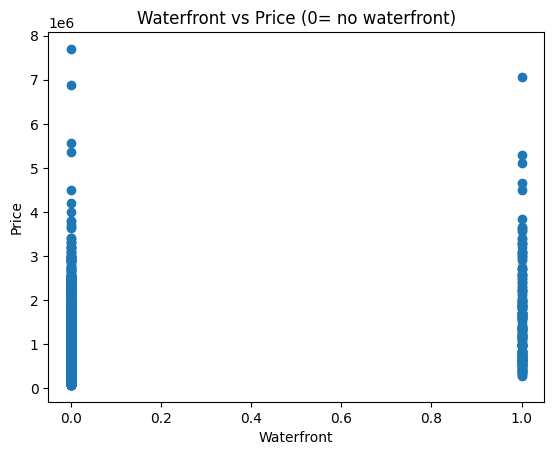

              date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  20141013T000000         3       1.00         1180      5650     1.0   
1  20141209T000000         3       2.25         2570      7242     2.0   
2  20150225T000000         2       1.00          770     10000     1.0   
3  20141209T000000         4       3.00         1960      5000     1.0   
4  20150218T000000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             

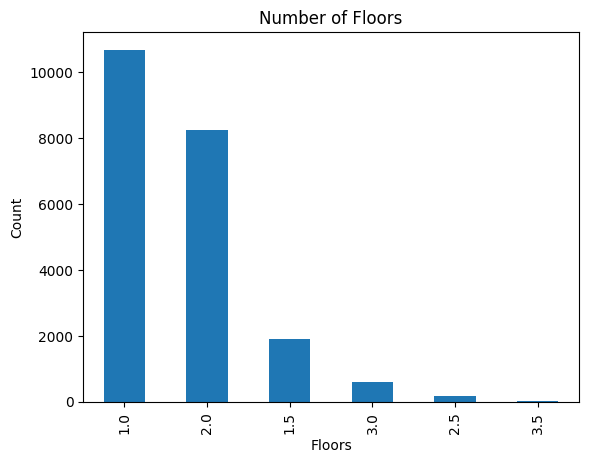

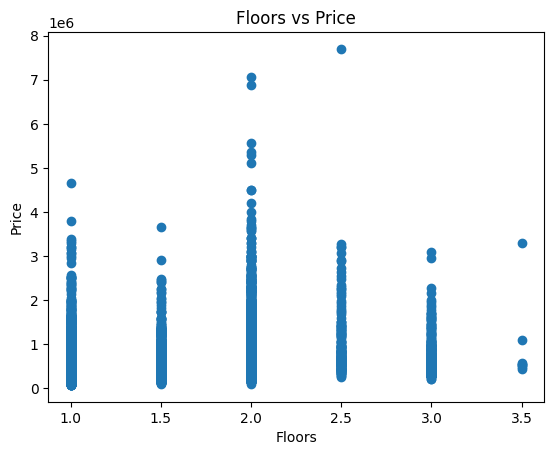

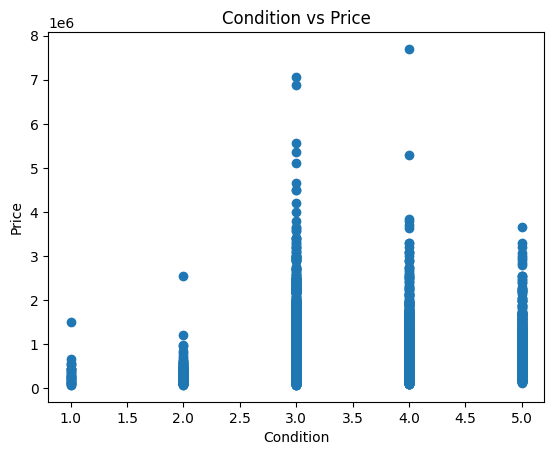

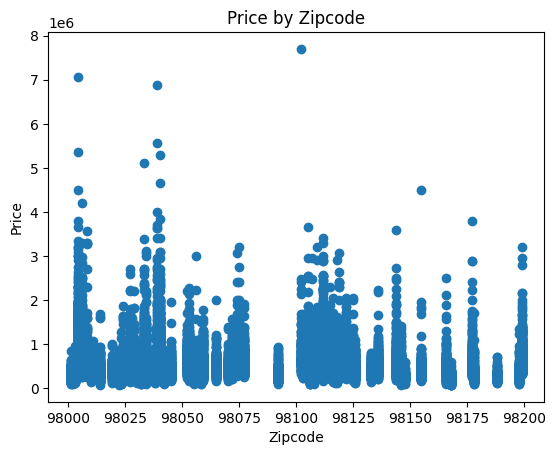

In [9]:
# Plot the distribution of bedrooms
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()
plt.show()

# Jointplot for latitude and longitude
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()

# Scatter plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")

plt.subplot(2, 2, 2)
plt.scatter(data.price, data.long)
plt.title("Price vs Longitude")

plt.subplot(2, 2, 3)
plt.scatter(data.price, data.lat)
plt.xlabel("Price")
plt.ylabel("Latitude")
plt.title("Latitude vs Price")

plt.subplot(2, 2, 4)
plt.scatter(data.bedrooms, data.price)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

plt.tight_layout()
plt.show()
sns.despine()

# Waterfront vs Price
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.title("Square Feet (Living + Basement) vs Price")
plt.show()

plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price (0= no waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()

# Drop unnecessary columns for training
train1 = data.drop(['id', 'price'], axis=1)
print(train1.head())

# Plot floors and condition against price
data.floors.value_counts().plot(kind='bar')
plt.title('Number of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.show()

plt.scatter(data.floors, data.price)
plt.title("Floors vs Price")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

plt.scatter(data.condition, data.price)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

plt.scatter(data.zipcode, data.price)
plt.title("Price by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()


Linear Regression score: 0.7335646231303175
Gradient Boosting score: 0.9224007927501816


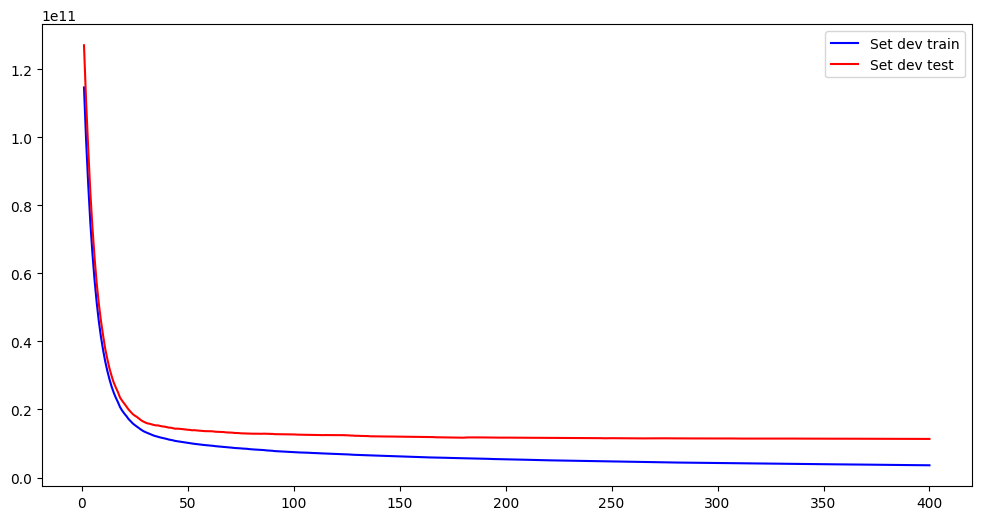

In [10]:
# Convert dates to 0 and 1
data['date'] = [1 if int(str(value)[:4]) == 2014 else 0 for value in data['date']]

# Prepare training and testing sets
labels = data['price']
train1 = data.drop(['id', 'price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

# Linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
print(f"Linear Regression score: {reg.score(x_test, y_test)}")

# Gradient Boosting Regressor
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
                                         learning_rate=0.1, loss='squared_error')
clf.fit(x_train, y_train)
print(f"Gradient Boosting score: {clf.score(x_test, y_test)}")

# Plot training deviance
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 400}
t_sc = np.zeros((params['n_estimators']), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i] = mean_squared_error(y_test, y_pred)
    
testsc = np.arange((params['n_estimators'])) + 1

plt.figure(figsize=(12, 6))
plt.plot(testsc, clf.train_score_, 'b-', label='Set dev train')
plt.plot(testsc, t_sc, 'r-', label='Set dev test')
plt.legend()
plt.show()


In [11]:
# PCA
pca = PCA()
pca.fit_transform(scale(train1))


array([[-2.63912921e+00, -2.21508289e-02, -3.19945945e-01, ...,
        -5.09379503e-01,  8.02082527e-02,  5.49709719e-16],
       [-2.25243801e-01,  1.70747997e+00, -7.64319282e-01, ...,
         1.85789179e-01, -9.81019712e-01, -4.45666642e-16],
       [-2.58818707e+00, -6.60887167e-01,  3.55764123e-01, ...,
         1.42737049e+00,  1.37321751e-01, -1.00742612e-15],
       ...,
       [-2.41120579e+00, -1.07548669e+00, -1.46683720e+00, ...,
        -6.95606695e-01, -9.66169827e-01, -1.15120138e-16],
       [ 3.13655998e-01, -1.92761669e+00, -1.03805358e+00, ...,
        -4.31441606e-01,  3.96116122e-01,  5.03047600e-18],
       [-2.42314973e+00, -1.06026237e+00, -1.47637686e+00, ...,
        -6.95275385e-01, -9.53057601e-01, -1.22167248e-16]])